# Approximate the Night Time of a Given Latitude

This approach takes into consideration one longitude sliver and multiple latitudes of high resoution 

One Factor to consider was dealing with optical observations is the approximate amount of night time that there is a given month. 

In [5]:
import numpy as np
import pytz
import datetime
from astropy import units as u
from astropy.coordinates import EarthLocation
from astroplan import Observer
from astropy.time import Time
import matplotlib.pyplot as plt
from datetime import timedelta
from timezonefinder import TimezoneFinder

In [6]:
location = EarthLocation.from_geodetic(lon=0*u.deg, lat=0*u.deg, height=0*u.m)
observer = Observer(location=location)

In [7]:
# Define the longitude and Latitude grids
lons = np.arange(-0.1, 0.1, 0.1)
lats = np.arange(-90, 90, 1)

# Calculate the average night duration for each location for each day of the month
avg_night_duration = np.zeros((len(lats), len(lons), 30))


In [8]:
year=2022
month=1
day=1
tf=TimezoneFinder()
night_duration_sum=np.zeros([len(lats),len(lons)])
original_dt = datetime.datetime(year, month, day, 0, 0, 0, tzinfo=pytz.utc)
sunrise_times = np.zeros((len(lats), len(lons)))
sunset_times = np.zeros((len(lats), len(lons)))
for i, lat in enumerate(lats):
    for j, lon in enumerate(lons):
        # Find the new timezeon based on lat and long
        # Find the timezone based on the latitude and longitude
        timezone_str = tf.timezone_at(lat=lat, lng=lon)
        target_timezone = pytz.timezone(timezone_str)
        dt=original_dt.astimezone(target_timezone)
        
        
        # Define the observer location
        location = EarthLocation.from_geodetic(lon=lon*u.deg, lat=lat*u.deg, height=0*u.m)
        observer = Observer(location=location)

        # Calculate the sunrise and sunset times
        #TODO: Add components of astronomical twilight


        # Pole Conditions (where sun may not rise/set)
        try:
            sunrise_time = observer.sun_rise_time(Time(dt), which='next').datetime
            sunset_time = observer.sun_set_time(Time(dt), which='next').datetime
        
            
        except:
            if observer.is_night(Time(dt)) ==True:
                sunrise_time = dt
                sunset_time = dt
            elif observer.is_night(Time(dt)) == False: # Is day
                sunrise_time = dt
                sunset_time = dt+timedelta(days=1)
        
            


        sunrise_times[i, j] = sunrise_time.timestamp()
        sunset_times[i, j] = sunset_time.timestamp()
night_duration=sunset_times-sunrise_times
#night_duration=abs(night_duration)
night_duration[night_duration<0]=0
night_duration_sum += night_duration



C:\Users\mstew\anaconda3\envs\ESS5400_2\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


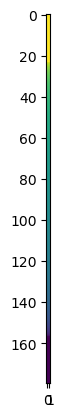

In [9]:
plt.imshow(night_duration)

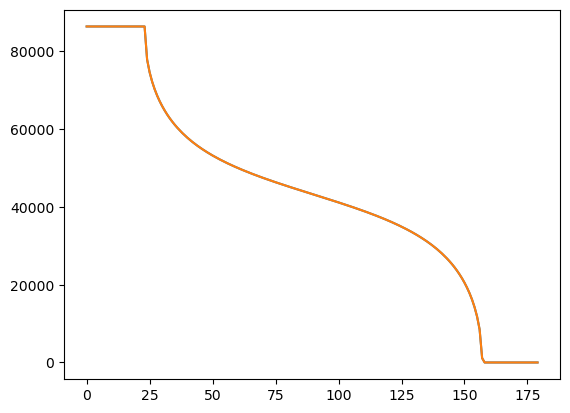

In [10]:
plt.plot(range(0,len(night_duration)),night_duration)

In [11]:
normalized_night_duration=night_duration_sum/(60*60*24)

In [21]:
# applying this to all longitudes
global_array=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
for i in range(0,np.shape(global_array)[1]):
    global_array[:,i]=normalized_night_duration[:,1]

Text(0.5, 0, '0-360 degrees')

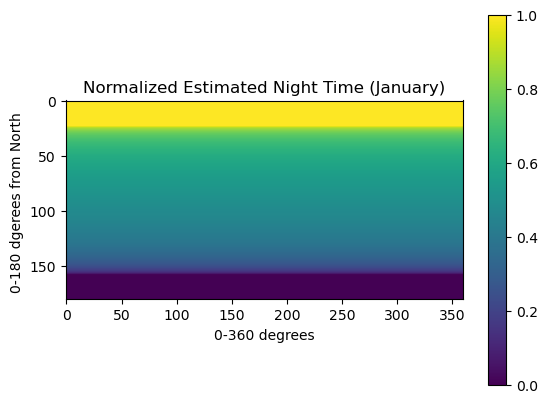

In [22]:
plt.imshow(global_array)

plt.title('Normalized Estimated Night Time (January)')
plt.colorbar()
plt.ylabel('0-180 dgerees from North ')
plt.xlabel('0-360 degrees')

# Repeat this for all Months

In [23]:
def calculate_average_night_time(month, day, year, lats, lons):
    original_dt = datetime.datetime(year, month, day, 0, 0, 0, tzinfo=pytz.utc)
    night_duration_sum = np.zeros([len(lats), len(lons)])
    sunrise_times = np.zeros((len(lats), len(lons)))
    sunset_times = np.zeros((len(lats), len(lons)))
    
    for i, lat in enumerate(lats):
        for j, lon in enumerate(lons):
            # Find the new timezone based on lat and long
            # Find the timezone based on the latitude and longitude
            timezone_str = tf.timezone_at(lat=lat, lng=lon)
            target_timezone = pytz.timezone(timezone_str)
            dt = original_dt.astimezone(target_timezone)

            # Define the observer location
            location = EarthLocation.from_geodetic(lon=lon*u.deg, lat=lat*u.deg, height=0*u.m)
            observer = Observer(location=location)

            # Calculate the sunrise and sunset times
            # TODO: Add components of astronomical twilight
            
            # Pole Conditions (where sun may not rise/set)
            try:
                sunrise_time = observer.sun_rise_time(Time(dt), which='next').datetime
                sunset_time = observer.sun_set_time(Time(dt), which='next').datetime
            except:
                if observer.is_night(Time(dt)) == True:
                    sunrise_time = dt
                    sunset_time = dt
                elif observer.is_night(Time(dt)) == False: # Is day
                    sunrise_time = dt
                    sunset_time = dt + timedelta(days=1)

            sunrise_times[i, j] = sunrise_time.timestamp()
            sunset_times[i, j] = sunset_time.timestamp()

    night_duration = sunset_times - sunrise_times
    night_duration[night_duration < 0] = 0
    night_duration_sum += night_duration
    
    return night_duration_sum / (60*60*24)


In [24]:
Normalized_Time_Night_01 = calculate_average_night_time(1,1,2022,lats,lons)
Normalized_Time_Night_02 = calculate_average_night_time(2,1,2022,lats,lons)
Normalized_Time_Night_03 = calculate_average_night_time(3,1,2022,lats,lons)
Normalized_Time_Night_04 = calculate_average_night_time(4,1,2022,lats,lons)
Normalized_Time_Night_05 = calculate_average_night_time(5,1,2022,lats,lons)
Normalized_Time_Night_06 = calculate_average_night_time(6,1,2022,lats,lons)
Normalized_Time_Night_07 = calculate_average_night_time(7,1,2022,lats,lons)
Normalized_Time_Night_08 = calculate_average_night_time(8,1,2022,lats,lons)
Normalized_Time_Night_09 = calculate_average_night_time(9,1,2022,lats,lons)
Normalized_Time_Night_10 = calculate_average_night_time(10,1,2022,lats,lons)
Normalized_Time_Night_11 = calculate_average_night_time(11,1,2022,lats,lons)
Normalized_Time_Night_12 = calculate_average_night_time(12,1,2022,lats,lons)

C:\Users\mstew\anaconda3\envs\ESS5400_2\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


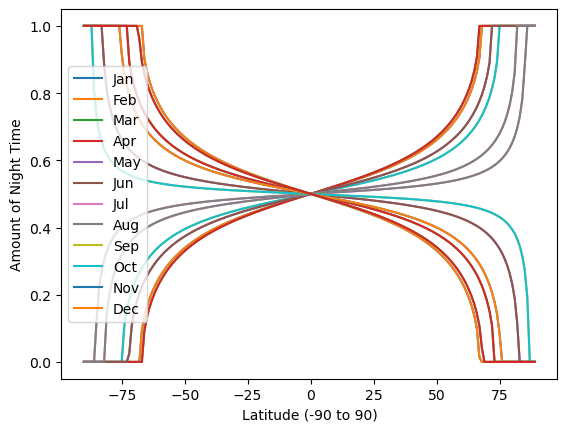

In [38]:
plt.plot(lats,Normalized_Time_Night_01)
plt.plot(lats,Normalized_Time_Night_02)
plt.plot(lats,Normalized_Time_Night_03)
plt.plot(lats,Normalized_Time_Night_04)
plt.plot(lats,Normalized_Time_Night_05)
plt.plot(lats,Normalized_Time_Night_06)
plt.plot(lats,Normalized_Time_Night_07)
plt.plot(lats,Normalized_Time_Night_08)
plt.plot(lats,Normalized_Time_Night_09)
plt.plot(lats,Normalized_Time_Night_10)
plt.plot(lats,Normalized_Time_Night_11)
plt.plot(lats,Normalized_Time_Night_12)
plt.xlabel('Latitude (-90 to 90)')
plt.ylabel('Amount of Night Time')
plt.legend(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

Apply this sliver of latitude to all longitudes

In [25]:
global_array_01=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_02=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_03=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_04=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_05=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_06=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_07=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_08=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_09=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_10=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_11=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))
global_array_12=np.zeros((len(np.arange(-90,90,1)),len(np.arange(-180,180,1))))

for i in range(0,np.shape(global_array_12)[1]):
    global_array_01[:,i]=Normalized_Time_Night_01[:,0]
    global_array_02[:,i]=Normalized_Time_Night_02[:,0]
    global_array_03[:,i]=Normalized_Time_Night_03[:,0]
    global_array_04[:,i]=Normalized_Time_Night_04[:,0]
    global_array_05[:,i]=Normalized_Time_Night_05[:,0]
    global_array_06[:,i]=Normalized_Time_Night_07[:,0]
    global_array_07[:,i]=Normalized_Time_Night_08[:,0]
    global_array_09[:,i]=Normalized_Time_Night_09[:,0]
    global_array_10[:,i]=Normalized_Time_Night_10[:,0]
    global_array_11[:,i]=Normalized_Time_Night_11[:,0]
    global_array_12[:,i]=Normalized_Time_Night_12[:,0]

## Save

In [ ]:
np.save("Normalized_Night_Time_01.npy",global_array_01)
np.save("Normalized_Night_Time_02.npy",global_array_02)
np.save("Normalized_Night_Time_03.npy",global_array_03)
np.save("Normalized_Night_Time_04.npy",global_array_04)
np.save("Normalized_Night_Time_05.npy",global_array_05)
np.save("Normalized_Night_Time_06.npy",global_array_06)
np.save("Normalized_Night_Time_07.npy",global_array_07)
np.save("Normalized_Night_Time_08.npy",global_array_08)
np.save("Normalized_Night_Time_09.npy",global_array_09)
np.save("Normalized_Night_Time_10.npy",global_array_10)
np.save("Normalized_Night_Time_11.npy",global_array_11)
np.save("Normalized_Night_Time_12.npy",global_array_12)

## Load

If the arrays have already been created:

In [4]:
global_array_01=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_01.npy")
global_array_02=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_02.npy")
global_array_03=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_03.npy")
global_array_04=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_04.npy")
global_array_05=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_05.npy")
global_array_06=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_06.npy")
global_array_07=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_07.npy")
global_array_08=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_08.npy")
global_array_09=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_09.npy")
global_array_10=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_10.npy")
global_array_11=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_11.npy")
global_array_12=np.load("Dark Times/Produced Numpy Arrays/Normalized_Night_Time_12.npy")

In [10]:
import rasterio
def save_tiff(array,dst_file):
    dst_crs = "EPSG:4326"  # coordinate reference system
    dst_transform = rasterio.transform.from_bounds(-180, -90, 180, 90, 3600, 1800)
    with rasterio.open(
        dst_file,'w+',driver='GTiff',
        height=array.shape[0],
        width=array.shape[1],
        count=1, 
        dtype=array.dtype, 
        crs=dst_crs, 
        transform=dst_transform) as dst:
        dst.write(array,1)

In [11]:
save_tiff(global_array_01,'Dark Times/Produced Tiff/Jan_Dark_Time.tif')
save_tiff(global_array_02,'Dark Times/Produced Tiff/Feb_Dark_Time.tif')
save_tiff(global_array_03,'Dark Times/Produced Tiff/Mar_Dark_Time.tif')
save_tiff(global_array_04,'Dark Times/Produced Tiff/Apr_Dark_Time.tif')
save_tiff(global_array_05,'Dark Times/Produced Tiff/May_Dark_Time.tif')
save_tiff(global_array_06,'Dark Times/Produced Tiff/Jun_Dark_Time.tif')
save_tiff(global_array_07,'Dark Times/Produced Tiff/Jul_Dark_Time.tif')
save_tiff(global_array_08,'Dark Times/Produced Tiff/Aug_Dark_Time.tif')
save_tiff(global_array_09,'Dark Times/Produced Tiff/Sep_Dark_Time.tif')
save_tiff(global_array_10,'Dark Times/Produced Tiff/Oct_Dark_Time.tif')
save_tiff(global_array_11,'Dark Times/Produced Tiff/Nov_Dark_Time.tif')
save_tiff(global_array_12,'Dark Times/Produced Tiff/Dec_Dark_Time.tif')